# TML Plantation Pilot Testing

This notebook is an initial comparison of model performance across three pilot regions: West Africa, Central America and South America. For each region the training data is loaded based by version (v1, v2, etc.) based on the Collect Earth survey. The labeled data is prepared for input to the model. Several classication models are tested and then performance is saved to a single csv. Performance is plotted on a learning curve to understand the impact of training set size. Finally, we perform a visual assessment of the predictions across a larger plot area.

* [Pilot 1: West Africa](#Pilot_1)
* [Pilot 2: Central America](#Pilot_2)
* [Pilot 3: South America](#Pilot_3)

Questions to consider:
1. Is there any consistency in model performance across regions?
2. How much is the transfer learning approach impacting performance?
3. How much training data is needed to improve performance?

In [61]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
import prepare_data as pp
import run_preds as rp
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='Pilot_1'></a> 
# Pilot 1: West Africa

**Training Data**: Oil palm and rubber plantations in Ghana and Ivory Coast.

## Performance

In [2]:
X, y = pp.create_xy((14, 14), ['v8'], drop_prob=False, verbose=False)

Plot id 8023 has no cloud free imagery and will be removed.
Plot id 8124 has no cloud free imagery and will be removed.
Training data includes 218 plot ids.
Baseline: 0.609


In [3]:
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale(X, y)

,model,cv,train_score,test_score,roc_auc,precision,recall,f1
0,svm_model_v8,0.8025,0.9254,0.767,0.8314,0.7305,0.5876,0.6513


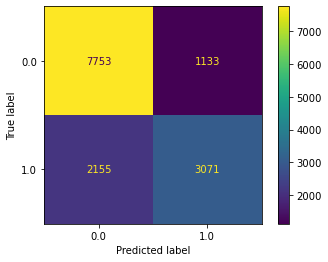

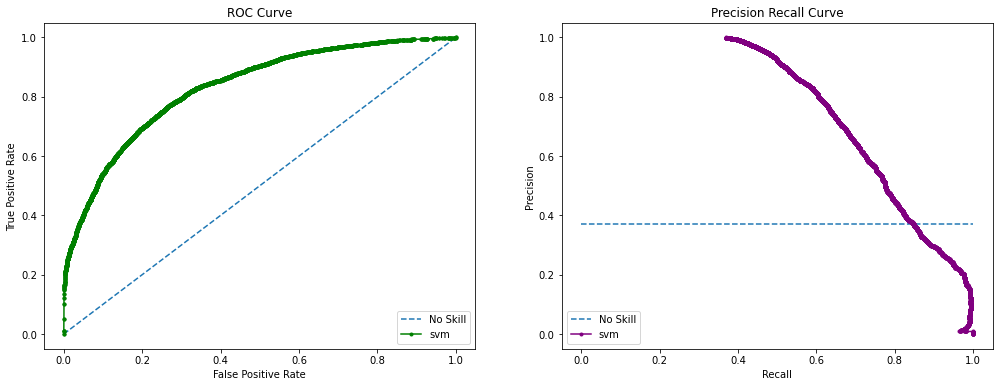

In [40]:
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'svm','v8')

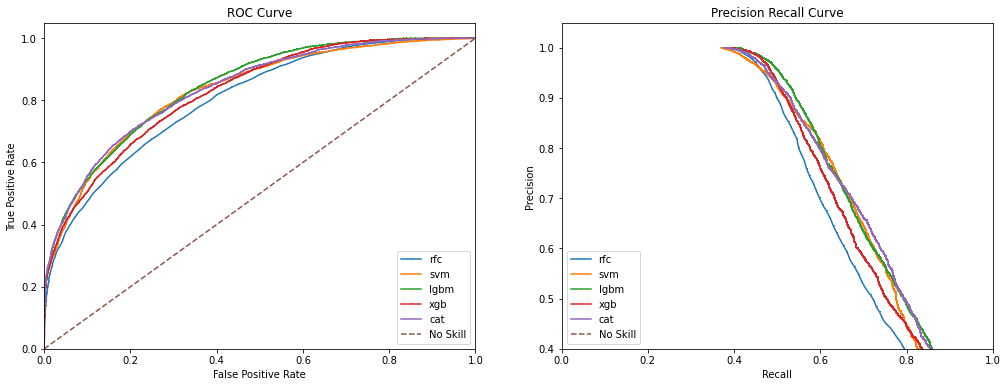

In [41]:
rp.roc_curve_comp(X_train_ss, X_test_ss, y_train, y_test, ['rfc', 'svm', 'lgbm', 'xgb', 'cat'], 'v8')

## Learning Curve

[10:09:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:19] WARNING: /Users/runner/miniforge3/cond

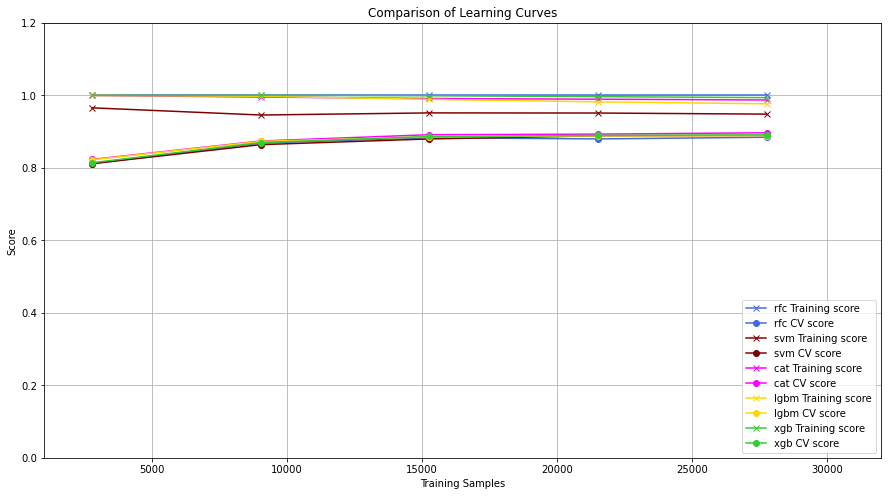

In [16]:
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v8', X_train_ss, y_train)

<a id='Pilot_2'></a> 
# Pilot 2: Central America

**Training Data**: Oil palm and orchard plantations in Guatemala and Costa Rica.

## Performance

In [53]:
X, y = pp.create_xy((14, 14), ['v3', 'v4', 'v10'], drop_prob=False, drop_feats=False, verbose=False)

Training data includes 265 plot ids.
Baseline: 0.491


In [54]:
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale(X, y)

,model,cv,train_score,test_score,roc_auc,precision,recall,f1
0,cat_model_v10,0.8884,0.9972,0.8523,0.9291,0.9239,0.7847,0.8487


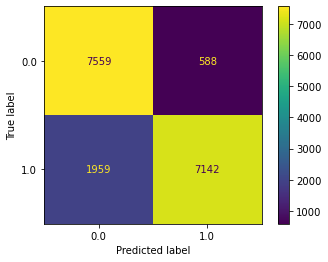

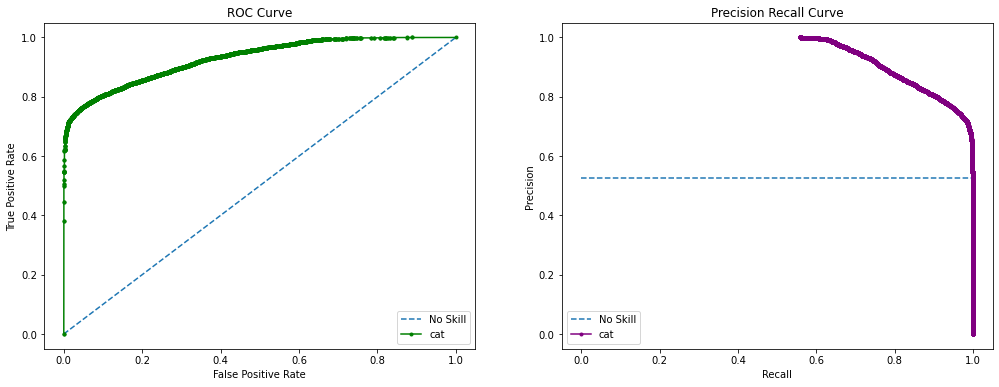

In [59]:
rp.fit_eval_classifier(X_train_ss, X_test_ss, y_train, y_test, 'cat','v10')

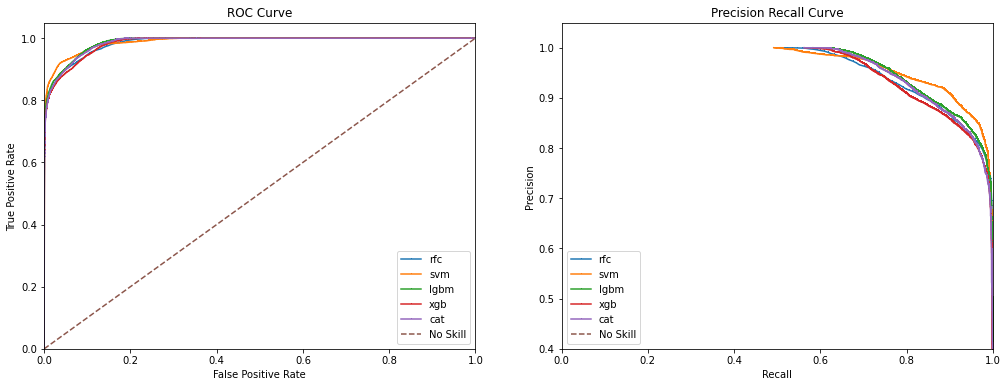

In [21]:
rp.roc_curve_comp(X_train_ss, X_test_ss, y_train, y_test, ['rfc', 'svm', 'lgbm', 'xgb', 'cat'], 'v10')

## Learning Curve

[18:13:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:14:04] WARNING: /Users/runner/miniforge3/cond

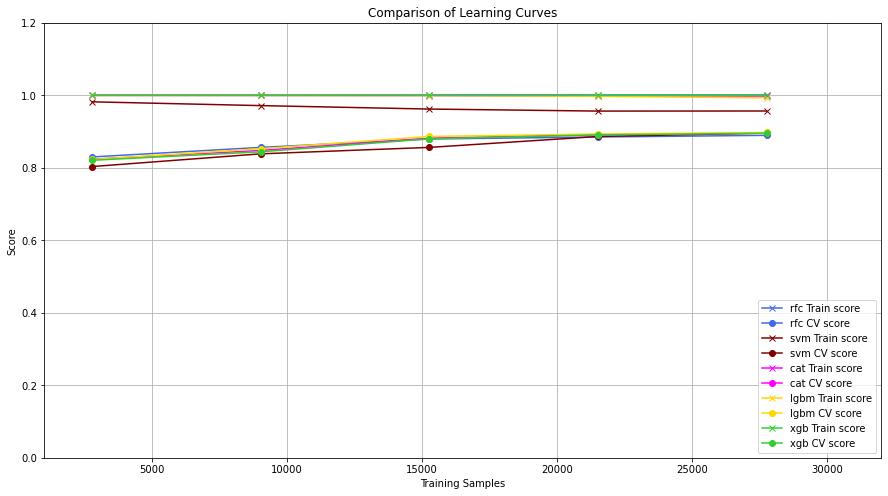

In [69]:
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v10', X_train_ss, y_train)

## Visual Validation

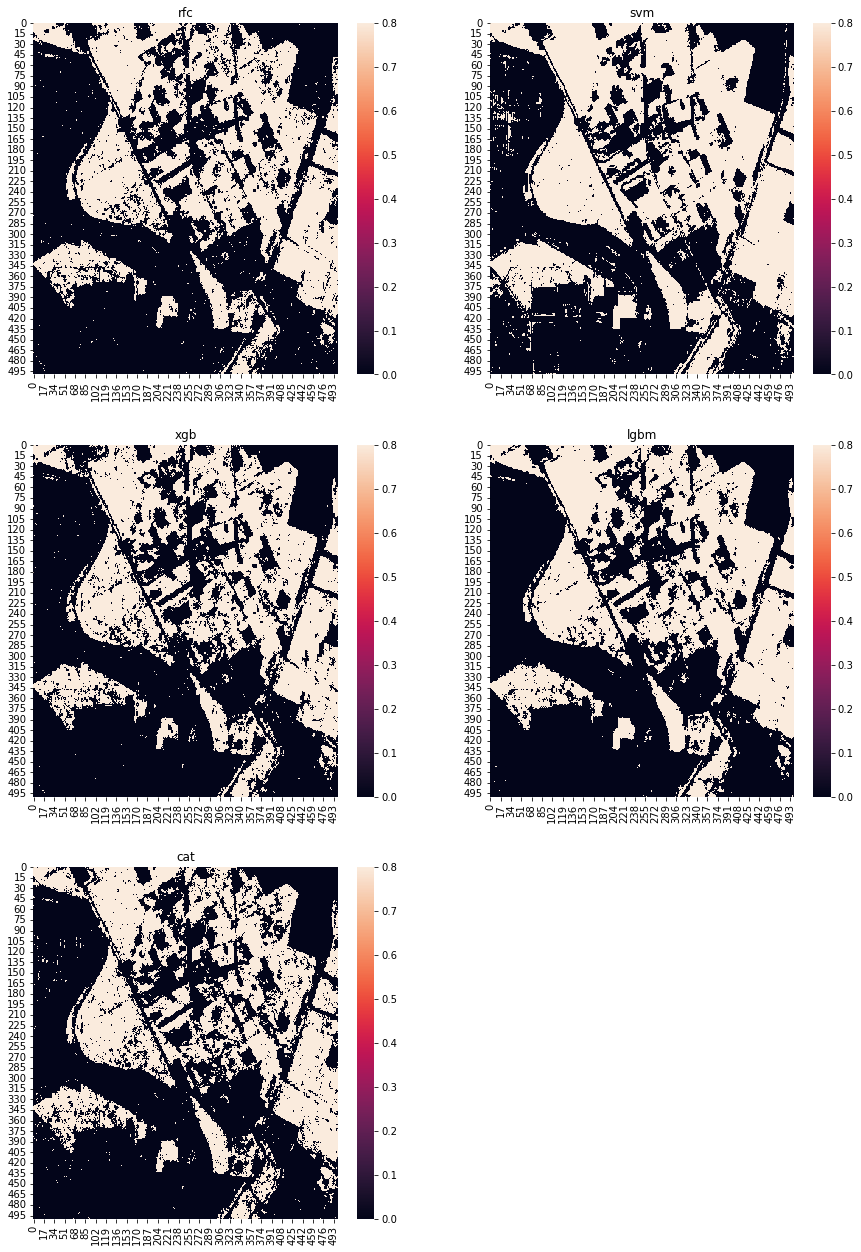

In [13]:
plt.figure(figsize=(15, 22))

x2_ss = pp.load_large_feats((500,500))

plt.subplot(3,2,1)
rp.visualize_large_feats('rfc', 'v4', x2_ss)

plt.subplot(3,2,2)
rp.visualize_large_feats('svm', 'v4', x2_ss)

plt.subplot(3,2,3)
rp.visualize_large_feats('xgb', 'v4', x2_ss)

plt.subplot(3,2,4)
rp.visualize_large_feats('lgbm', 'v4', x2_ss)

plt.subplot(3,2,5)
rp.visualize_large_feats('cat', 'v4', x2_ss)

## Results

Learning Curve  


<a id='Pilot_3'></a> 
# Pilot 3: South America

**Training Data**: Oil palm, rubber, fruit, cocoa and eucalyptus plantations in Brazil.

## Performance

In [18]:
X, y = pp.create_xy((14, 14), ['v9'], drop_prob=False, drop_feats=False, verbose=False)

Training data includes 207 plot ids.
Baseline: 0.67


In [19]:
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale(X, y)

## Learning Curve

[11:42:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:42:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:42:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:42:11] WARNING: /Users/runner/miniforge3/cond

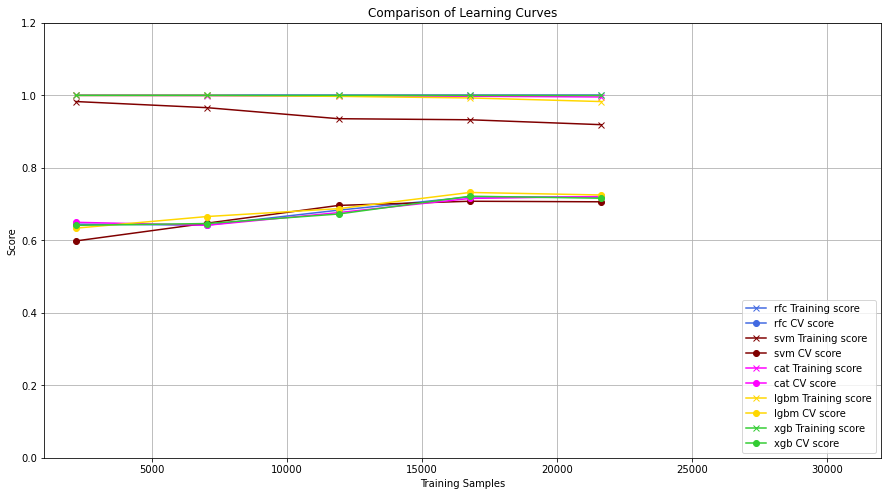

In [25]:
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v9', X_train_ss, y_train)

## Visual Validation

# Hypotheses
np: model trained without TML probability  
nf: model trained without TML features  

## Drop TML Tree Probability
Test the effect of removing the TML tree probability on performance.

In [50]:
X, y = pp.create_xy((14, 14), ['v3', 'v4', 'v10'], drop_prob=True, drop_feats=False, verbose=False)

Training data includes 265 plot ids.
Baseline: 0.491


In [51]:
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale(X, y)

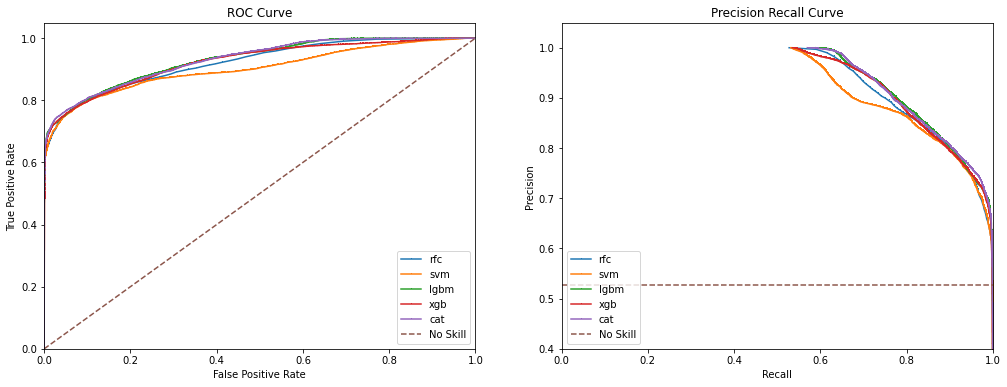

In [37]:
# trained all 5 models with dropped probability
rp.roc_curve_comp(X_train_ss, X_test_ss, y_train, y_test, ['rfc', 'svm', 'lgbm', 'xgb', 'cat'], 'v10_np')

## Drop TML Features
Test the effect of removing TML features on performance (how dependent is score on training set size? transfer learning should allow us to require fewer samples).

In [40]:
X, y = pp.create_xy((14, 14), ['v3', 'v4', 'v10'], drop_prob=False, drop_feats=True, verbose=False)

Training data includes 265 plot ids.
Baseline: 0.491


In [41]:
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_and_scale(X, y)

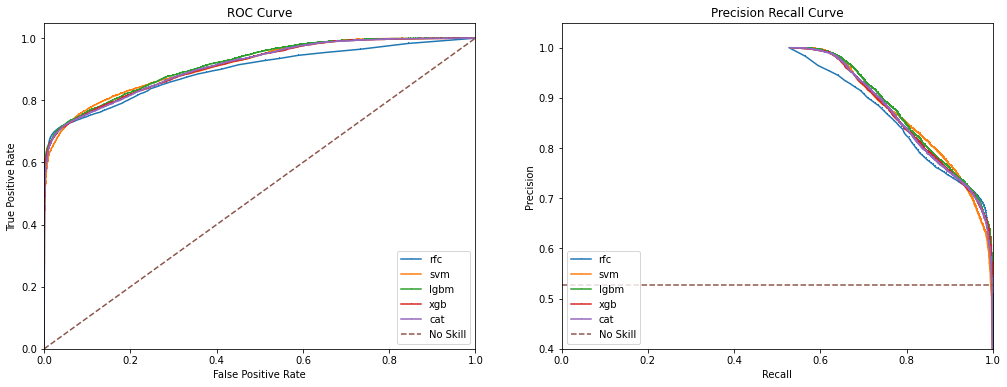

In [48]:
# trained all 5 models with dropped features
rp.roc_curve_comp(X_train_ss, X_test_ss, y_train, y_test, ['rfc', 'svm', 'lgbm', 'xgb', 'cat'], 'v10_nf')

[15:46:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:41] WARNING: /Users/runner/miniforge3/cond

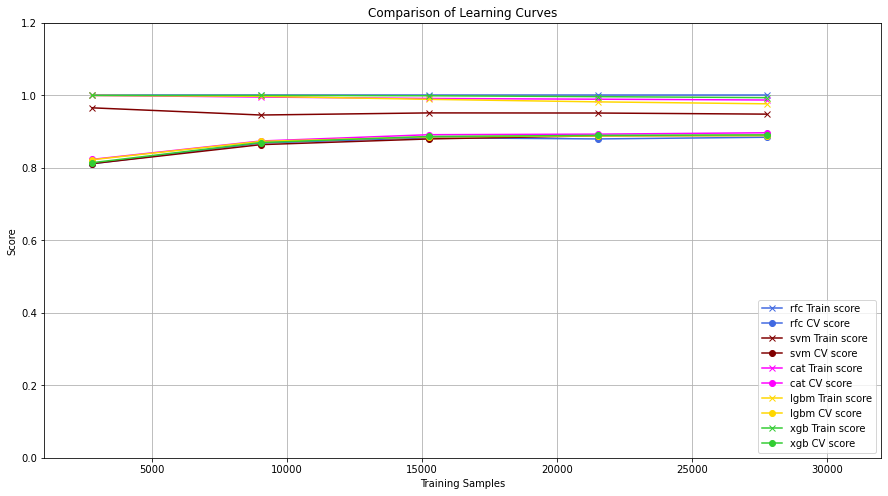

In [49]:
# No Features Learning Curve
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v10_nf', X_train_ss, y_train)

[16:46:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:06] WARNING: /Users/runner/miniforge3/cond

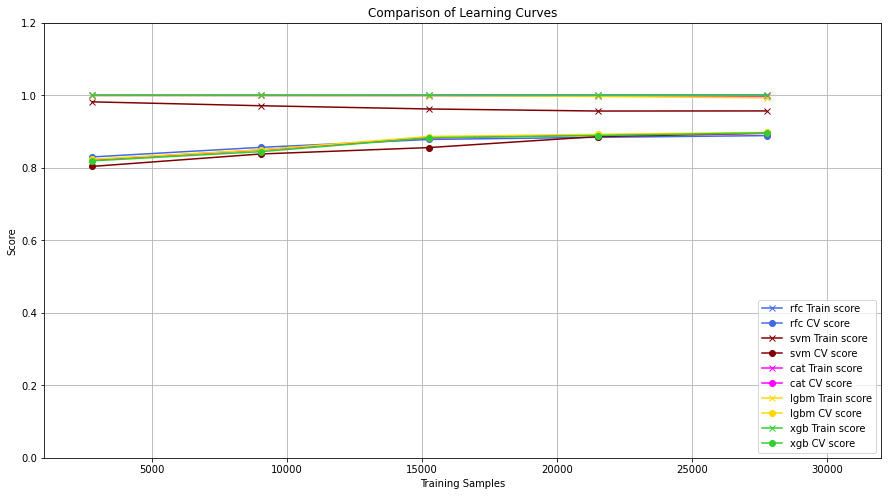

In [52]:
# No TML Probability Learning Curve
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v10_np', X_train_ss, y_train)

[12:48:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:48:29] WARNING: /Users/runner/miniforge3/cond

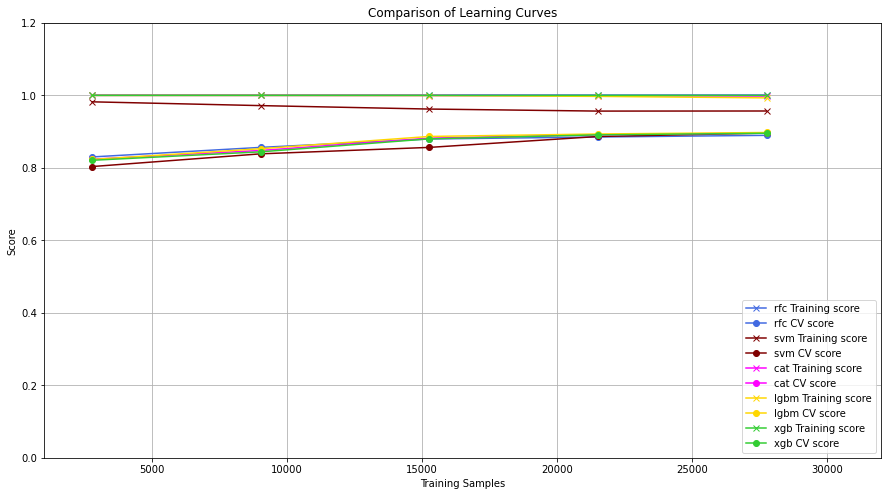

In [29]:
# Normal Learning Curve (incl features)
rp.learning_curve_comp(['rfc', 'svm', 'cat', 'lgbm', 'xgb'], 'v10', X_train_ss, y_train)

In [68]:
df = pd.read_csv('../models/mvp_scores.csv')
df[15:]

,model,cv,train_score,test_score,roc_auc,precision,recall,f1
15,rfc_model_v10_np,0.8828,1.0000,0.8486,0.9214,0.9316,0.7696,0.8429
16,cat_model_v10_np,0.8908,0.9969,0.8518,0.9302,0.9210,0.7865,0.8485
17,lgbm_model_v10_np,0.8865,0.9887,0.8486,0.9300,0.9204,0.7806,0.8448
18,xgb_model_v10_np,0.8841,0.9999,0.8472,0.9232,0.9149,0.7832,0.8439
19,svm_model_v10_np,0.8911,0.9551,0.8463,0.9017,0.9090,0.7876,0.8439
20,svm_model_v10_nf,0.8897,0.9463,0.8327,0.9124,0.9076,0.7602,0.8274
21,cat_model_v10_nf,0.8957,0.9850,0.8262,0.9101,0.9053,0.7489,0.8197
22,xgb_model_v10_nf,0.8919,0.9900,0.8261,0.9098,0.9006,0.7535,0.8205
23,lgbm_model_v10_nf,0.8886,0.9723,0.8290,0.9153,0.9068,0.7533,0.8230
24,rfc_model_v10_nf,0.8919,1.0000,0.8245,0.8947,0.9133,0.7374,0.8160


The learning curve is a line plot illustrating the relationship between learning (y-axis) over experience (x-axis). The model is scored on both the training and testing sets using R2 as a default.

Learning curves for classification models fit **with TML features** (v_10):
- For all the models except SVM, training performance remains at it's maximum, regardless of the number of training samples.
- CV score increases over time but appears to plateau.
- Overall, performance is consistent across all classification models.

Learning curves for classification models fit **without TML probability** (v_10_np):
- No significant difference observed when removing the probability.

Learning curves for classification models fit **without TML features** (v_10_nf):
- For all models except RFC, training performance sees a minor drop and the model is less overfit as training samples increase.
- CV score sees minor increases over time and performance across classification models has more variation. Performance shows potential to improve as training samples increase.

Conclusions: This exercise supports the hypothesis that transfer learning allows us to require fewer training samples. When TML features are excluded we see 1) Improved scores as sample size increases and 2) Greater variability in performance across the models.  
The RFC model illustrates the most severe overfitting in all instances. The SVM model appears the most sensitive to sample size.